In [1]:
## Notebook used to create plots showing the shift in the jet stream, using classification of case years based on the detrended
## sea ice area data from 1980-2020

##Created by Kendra Herweck

In [1]:
import netCDF4 as nc
import numpy as np
import datetime as dt  # Python standard library datetime  module
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from astropy.table import Table
from astropy.io import ascii
from pandas import read_csv
from matplotlib.dates import DateFormatter
from pandas import DataFrame
from pandas import Grouper
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import xarray as xr
from glob import glob
import scipy.interpolate
from scipy.interpolate import griddata
from scipy.interpolate import interp2d

## Low SIC vs. Climatology

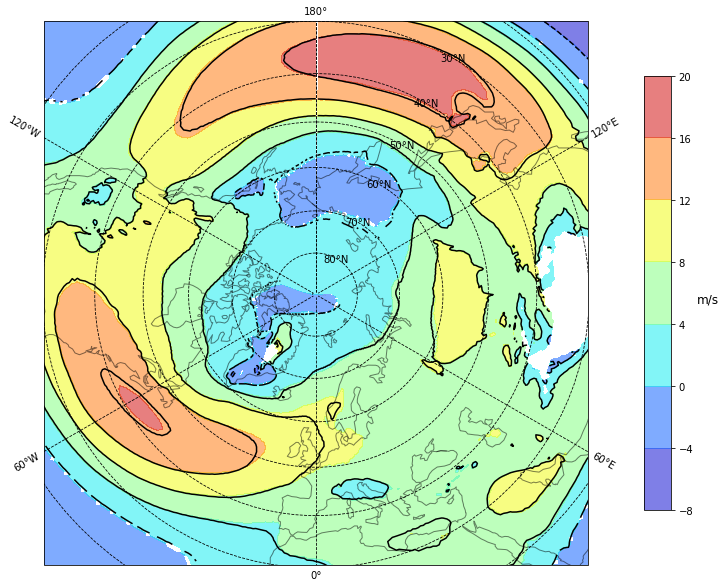

In [64]:
f = nc.Dataset('LowSICYears-WindSpeed-10deg_detrended-data_700hPa.nc', 'r')
f2 = nc.Dataset('Climatological-WindSpeed_1980-2020_700hPa.nc', 'r')
lat= f.variables['lat']
lon=f.variables['lon']
wind=f.variables['U'][:,:]
wind_30=f2.variables['U'][0,:,:]     ## 700 hpa 

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-179,179,30,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap=plt.cm.jet,alpha=0.5)
#plt.title('Average Winter Eastward Wind Speed in El Nino Years between 1980-1999, 700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
plt.contour(lons, lats, wind_30,transform=ccrs.PlateCarree(),colors='black')

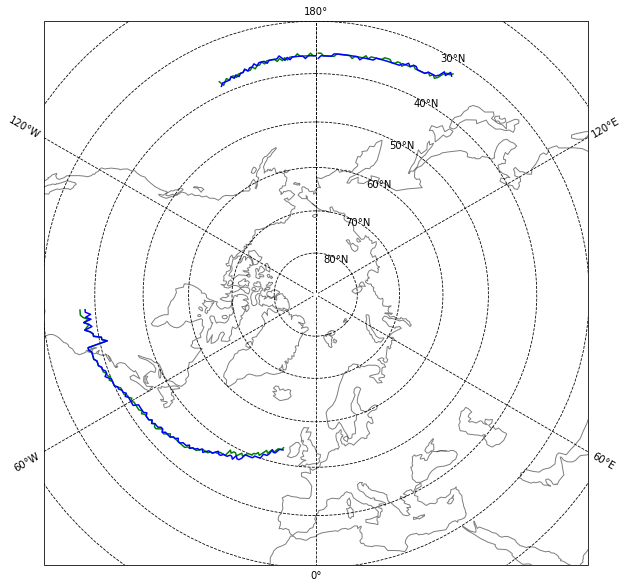

In [28]:
f = nc.Dataset('LowSICYears-WindSpeed-10deg_detrended-data_700hPa.nc', 'r')
lat= f.variables['lat']
lon=f.variables['lon']
wind=f.variables['U'][0,:]     ## 700 hpa 

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-179,179,30,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap=plt.cm.jet,alpha=0.5)
#plt.contour(lons, lats, wind,transform=ccrs.PlateCarree(),colors='black')
#plt.title('Average Winter Eastward Wind Speed in El Nino Years between 1980-1999, 700 hpa', size=14)
#cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
#cb.set_label('m/s',size=12,rotation=0,labelpad=15)

#file = 'ElNino-WindSpeed-10deg_1980-1999.nc'
#f = nc.Dataset(file, 'r')
#print(f)
lowsic_lat_list=[]
lowsic_lon_list=[]
speed_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
lowsic_lon_list=lon[:]
wind=f.variables['U'][:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    
    lowsic_lat_coord = f.variables['lat'][result[0]]
    lowsic_lat_coord=lowsic_lat_coord.compressed()
    lowsic_lat_coord = lowsic_lat_coord[0]

    lowsic_lat_list.append(lowsic_lat_coord)
f.close()

file = 'Climatological-WindSpeed_1980-2020_700hPa.nc'
f = nc.Dataset(file, 'r')
#print(f)
neut_lat_list=[]
neut_lon_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
neut_lon_list=lon[:]
wind=f.variables['U'][0,:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][0,:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    neut_lat_coord = f.variables['lat'][result[0]]
    neut_lat_coord=neut_lat_coord.compressed()
    neut_lat_coord = neut_lat_coord[0]
    neut_lat_list.append(neut_lat_coord)


na_lowsic_lat_list = lowsic_lat_list[150:270]
na_lowsic_lon_list = lowsic_lon_list[150:270]
np_lowsic_lat_list=lowsic_lat_list[525:576]
np_lowsic_lon_list=lowsic_lon_list[525:576]
np2_lowsic_lat_list=lowsic_lat_list[0:40]
np2_lowsic_lon_list=lowsic_lon_list[0:40]

na_neut_lat_list=neut_lat_list[150:270]
na_neut_lon_list=neut_lon_list[150:270]
np_neut_lat_list=neut_lat_list[525:576]
np_neut_lon_list=neut_lon_list[525:576]
np2_neut_lat_list=neut_lat_list[0:40]
np2_neut_lon_list=neut_lon_list[0:40]

plt.plot(na_lowsic_lon_list, na_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np_lowsic_lon_list, np_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np2_lowsic_lon_list, np2_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(na_neut_lon_list, na_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np_neut_lon_list, np_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np2_neut_lon_list, np2_neut_lat_list, color='blue', transform=ccrs.PlateCarree())

## El Nino vs. Climatology

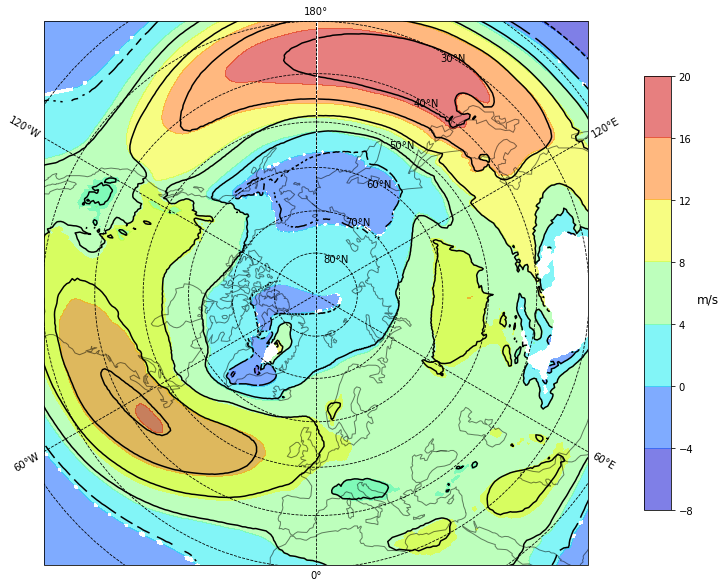

In [66]:
f = nc.Dataset('ElNinoYears-WindSpeed-10deg_detrended-data_700hPa.nc', 'r')
f2 = nc.Dataset('Climatological-WindSpeed_1980-2020_700hPa.nc', 'r')
lat= f.variables['lat']
lon=f.variables['lon']
wind=f.variables['U'][:,:]
wind_30=f2.variables['U'][0,:,:]     ## 700 hpa 

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-179,179,30,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap=plt.cm.jet,alpha=0.5)
#plt.title('Average Winter Eastward Wind Speed in El Nino Years between 1980-1999, 700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
plt.contour(lons, lats, wind_30,transform=ccrs.PlateCarree(),colors='black')

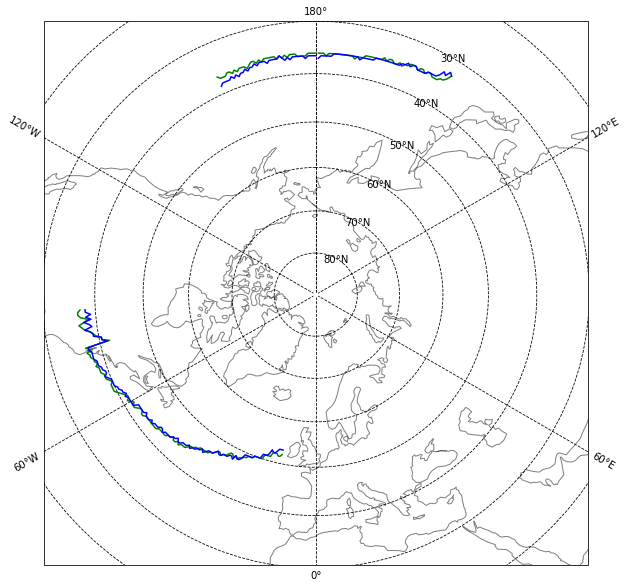

In [24]:
f = nc.Dataset('ElNinoYears-WindSpeed-10deg_detrended-data_700hPa.nc', 'r')
lat= f.variables['lat']
lon=f.variables['lon']
wind=f.variables['U'][0,:]     ## 700 hpa 

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-179,179,30,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap=plt.cm.jet,alpha=0.5)
#plt.contour(lons, lats, wind,transform=ccrs.PlateCarree(),colors='black')
#plt.title('Average Winter Eastward Wind Speed in El Nino Years between 1980-1999, 700 hpa', size=14)
#cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
#cb.set_label('m/s',size=12,rotation=0,labelpad=15)

#file = 'ElNino-WindSpeed-10deg_1980-1999.nc'
#f = nc.Dataset(file, 'r')
#print(f)
lowsic_lat_list=[]
lowsic_lon_list=[]
speed_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
lowsic_lon_list=lon[:]
wind=f.variables['U'][:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    
    lowsic_lat_coord = f.variables['lat'][result[0]]
    lowsic_lat_coord=lowsic_lat_coord.compressed()
    lowsic_lat_coord = lowsic_lat_coord[0]

    lowsic_lat_list.append(lowsic_lat_coord)
f.close()

file = 'Climatological-WindSpeed_1980-2020_700hPa.nc'
f = nc.Dataset(file, 'r')
#print(f)
neut_lat_list=[]
neut_lon_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
neut_lon_list=lon[:]
wind=f.variables['U'][0,:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][0,:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    neut_lat_coord = f.variables['lat'][result[0]]
    neut_lat_coord=neut_lat_coord.compressed()
    neut_lat_coord = neut_lat_coord[0]
    neut_lat_list.append(neut_lat_coord)


na_lowsic_lat_list = lowsic_lat_list[150:270]
na_lowsic_lon_list = lowsic_lon_list[150:270]
np_lowsic_lat_list=lowsic_lat_list[525:576]
np_lowsic_lon_list=lowsic_lon_list[525:576]
np2_lowsic_lat_list=lowsic_lat_list[0:40]
np2_lowsic_lon_list=lowsic_lon_list[0:40]

na_neut_lat_list=neut_lat_list[150:270]
na_neut_lon_list=neut_lon_list[150:270]
np_neut_lat_list=neut_lat_list[525:576]
np_neut_lon_list=neut_lon_list[525:576]
np2_neut_lat_list=neut_lat_list[0:40]
np2_neut_lon_list=neut_lon_list[0:40]

plt.plot(na_lowsic_lon_list, na_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np_lowsic_lon_list, np_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np2_lowsic_lon_list, np2_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(na_neut_lon_list, na_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np_neut_lon_list, np_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np2_neut_lon_list, np2_neut_lat_list, color='blue', transform=ccrs.PlateCarree())

## Low SIC & El Nino vs. Climatology

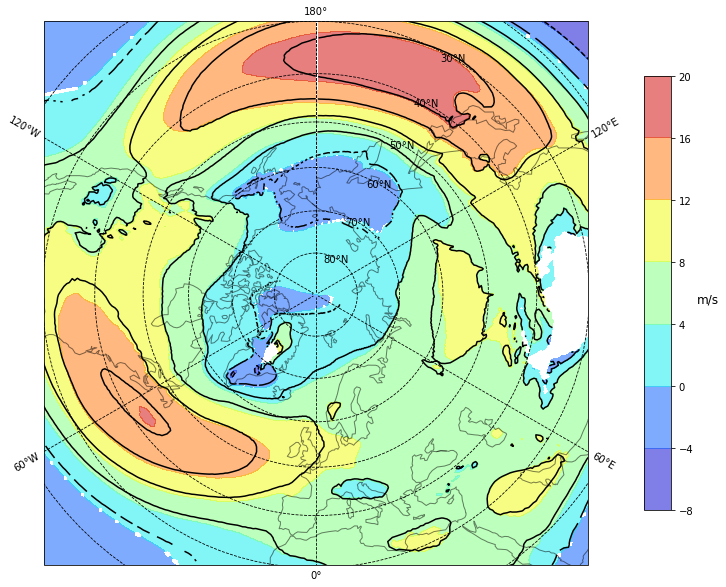

In [63]:
f = nc.Dataset('ElNino_LowSICYears-WindSpeed-10deg_detrended-data_700hPa.nc', 'r')
f2 = nc.Dataset('Climatological-WindSpeed_1980-2020_700hPa.nc', 'r')
#print(f2['lev'][:])
lat= f.variables['lat']
lon=f.variables['lon']
wind=f.variables['U'][:,:]
wind_30=f2.variables['U'][0,:,:]     ## 700 hpa 

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-179,179,30,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap=plt.cm.jet,alpha=0.5)
#plt.title('Average Winter Eastward Wind Speed in El Nino Years between 1980-1999, 700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
plt.contour(lons, lats, wind_30,transform=ccrs.PlateCarree(),colors='black')

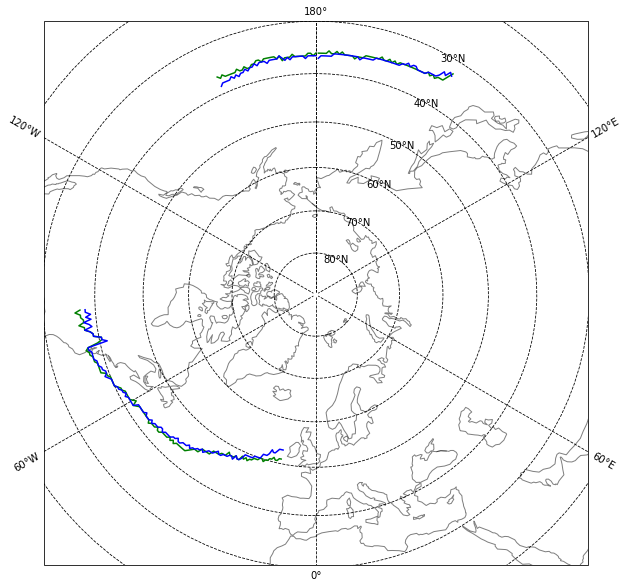

In [27]:
f = nc.Dataset('ElNino_LowSICYears-WindSpeed-10deg_detrended-data_700hPa.nc', 'r')
lat= f.variables['lat']
lon=f.variables['lon']
wind=f.variables['U'][0,:]     ## 700 hpa 

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-179,179,30,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap=plt.cm.jet,alpha=0.5)
#plt.contour(lons, lats, wind,transform=ccrs.PlateCarree(),colors='black')
#plt.title('Average Winter Eastward Wind Speed in El Nino Years between 1980-1999, 700 hpa', size=14)
#cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
#cb.set_label('m/s',size=12,rotation=0,labelpad=15)

#file = 'ElNino-WindSpeed-10deg_1980-1999.nc'
#f = nc.Dataset(file, 'r')
#print(f)
lowsic_lat_list=[]
lowsic_lon_list=[]
speed_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
lowsic_lon_list=lon[:]
wind=f.variables['U'][:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    
    lowsic_lat_coord = f.variables['lat'][result[0]]
    lowsic_lat_coord=lowsic_lat_coord.compressed()
    lowsic_lat_coord = lowsic_lat_coord[0]

    lowsic_lat_list.append(lowsic_lat_coord)
f.close()

file = 'Climatological-WindSpeed_1980-2020_700hPa.nc'
f = nc.Dataset(file, 'r')
#print(f)
neut_lat_list=[]
neut_lon_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
neut_lon_list=lon[:]
wind=f.variables['U'][0,:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][0,:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    neut_lat_coord = f.variables['lat'][result[0]]
    neut_lat_coord=neut_lat_coord.compressed()
    neut_lat_coord = neut_lat_coord[0]
    neut_lat_list.append(neut_lat_coord)


na_lowsic_lat_list = lowsic_lat_list[150:270]
na_lowsic_lon_list = lowsic_lon_list[150:270]
np_lowsic_lat_list=lowsic_lat_list[525:576]
np_lowsic_lon_list=lowsic_lon_list[525:576]
np2_lowsic_lat_list=lowsic_lat_list[0:40]
np2_lowsic_lon_list=lowsic_lon_list[0:40]

na_neut_lat_list=neut_lat_list[150:270]
na_neut_lon_list=neut_lon_list[150:270]
np_neut_lat_list=neut_lat_list[525:576]
np_neut_lon_list=neut_lon_list[525:576]
np2_neut_lat_list=neut_lat_list[0:40]
np2_neut_lon_list=neut_lon_list[0:40]

plt.plot(na_lowsic_lon_list, na_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np_lowsic_lon_list, np_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np2_lowsic_lon_list, np2_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(na_neut_lon_list, na_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np_neut_lon_list, np_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np2_neut_lon_list, np2_neut_lat_list, color='blue', transform=ccrs.PlateCarree())

## Jet Shift Calculation

## N. Atlantic


In [36]:
i=1980
file = 'WindSpeed-{}.nc'.format(i)
f = nc.Dataset(file, 'r')
print(np.nanmax(f['U'][:]))

33.875


### Climatological 

In [48]:
### first value
year_list=[]
lat_list=[]
speed_list=[]
for i in range(1980,2021):  #2020
    year_list.append(i)
    file = 'WindSpeed-{}.nc'.format(i)
    f = nc.Dataset(file, 'r')
    lat= f.variables['lat'] ##161
    lon=f.variables['lon'][32:288] ##576
    wind=f.variables['U'][0,0,:,32:288]     ## 700 hpa; time,level,lat,lon
    #print(f.variables['lon'][207])
    #print(f.variables['lat'][66])
    #print(f.variables['U'][0,66,204])
    #print(lat[:])
    #print(lon[:])
    
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.max(wind_nonan)
    #maxwind=np.nanmax(wind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    ##have to add on shift from subsetted indices (ie +81 from above)
    
#    mid = np.median(result[0])
#    if mid%2 != 0:
#        mid = np.floor(mid)
#    #print(mid)
#    boolarr2 =(result[0]==mid)
#    result2=np.where(boolarr2)
#    mid_index = np.median(result2)
#    if mid_index%2 != 0:
#        mid_index = np.floor(mid_index)
#    mid_index=int(mid_index)
    
    
    
    lat_coord = f.variables['lat'][result[0]]
    lat_coord=lat_coord.compressed()
    lat_coord = lat_coord[0]
    lat_list.append(lat_coord)
    latlist=[]
    lonlist=[]
    #latlist.append(result[0][mid_index])
    #lonlist.append(result[1][mid_index])
    for elem in result[0]:
        latlist.append(elem)
    for elem in result[1]:
        lonlist.append(elem+32)
print(year_list)
print(lat_list)
print(speed_list)

data_tbl = Table([year_list,lat_list,speed_list],names=('Year','Latitude','Wind Speed'))
print(data_tbl)
data_tbl.write('yearly_jetstream_latspeed-NAtlantic_detrended.csv',overwrite=True)

[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
[34.0, 34.0, 41.5, 35.5, 35.5, 43.5, 43.0, 41.5, 42.5, 42.5, 42.0, 43.5, 41.0, 44.0, 44.0, 44.0, 37.0, 39.0, 36.5, 40.0, 41.0, 38.0, 41.5, 42.0, 40.0, 57.0, 41.0, 43.0, 42.0, 41.5, 36.5, 35.5, 45.0, 43.5, 43.5, 50.0, 38.0, 39.0, 43.0, 41.5, 44.0]
[18.5, 17.5625, 17.9375, 19.8125, 17.375, 18.0, 18.6875, 17.75, 17.875, 19.8125, 21.5, 19.1875, 16.6875, 16.875, 20.25, 18.4375, 16.3125, 16.375, 18.6875, 18.375, 17.5, 18.0625, 17.0625, 19.875, 17.0625, 16.0, 16.6875, 18.5, 18.6875, 17.75, 18.0625, 16.375, 16.9375, 17.125, 21.625, 18.6875, 18.1875, 16.375, 18.3125, 19.25, 18.875]
Year Latitude Wind Speed
---- -------- ----------
1980     34.0       18.5
1981     34.0    17.5625
1982     41.5    17.9375
1983     35.5    19.8125
1984     35.5     17.37

### El Nino

In [44]:
#years:1983,1987,1988,1992,1995,1998,2003,2005,2007,2010,2015,2016,2019 
### first value
year_list=[]
lat_list=[]
speed_list=[]
for i in (1983,1987,1988,1992,1995,1998,2003,2005,2007,2010,2015,2016,2019 ): 
    year_list.append(i)
    file = 'WindSpeed-{}.nc'.format(i)
    f = nc.Dataset(file, 'r')
    lat= f.variables['lat'] ##161
    lon=f.variables['lon'][32:288] ##576
    wind=f.variables['U'][0,0,:,32:288]     ## 700 hpa; time,level,lat,lon
    #print(f.variables['lon'][207])
    #print(f.variables['lat'][66])
    #print(f.variables['U'][0,66,204])
    #print(lat[:])
    #print(lon[:])
    
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.max(wind_nonan)
    #maxwind=np.nanmax(wind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    ##have to add on shift from subsetted indices (ie +81 from above)
    
#    mid = np.median(result[0])
#    if mid%2 != 0:
#        mid = np.floor(mid)
#    #print(mid)
#    boolarr2 =(result[0]==mid)
#    result2=np.where(boolarr2)
#    mid_index = np.median(result2)
#    if mid_index%2 != 0:
#        mid_index = np.floor(mid_index)
#    mid_index=int(mid_index)
    
    
    
    lat_coord = f.variables['lat'][result[0]]
    lat_coord=lat_coord.compressed()
    lat_coord = lat_coord[0]
    lat_list.append(lat_coord)
    latlist=[]
    lonlist=[]
    #latlist.append(result[0][mid_index])
    #lonlist.append(result[1][mid_index])
    for elem in result[0]:
        latlist.append(elem)
    for elem in result[1]:
        lonlist.append(elem+32)
print(year_list)
print(lat_list)
print(speed_list)

data_tbl = Table([year_list,lat_list,speed_list],names=('Year','Latitude','Wind Speed'))
print(data_tbl)
avg = np.mean(data_tbl['Wind Speed'])
print(avg)
#data_tbl.write('new-yearly_jetstream_latspeed-NAtlantic.csv',overwrite=True)

[1983, 1987, 1988, 1992, 1995, 1998, 2003, 2005, 2007, 2010, 2015, 2016, 2019]
[35.5, 41.5, 42.5, 41.0, 44.0, 36.5, 42.0, 57.0, 43.0, 36.5, 50.0, 38.0, 41.5]
[19.8125, 17.75, 17.875, 16.6875, 18.4375, 18.6875, 19.875, 16.0, 18.5, 18.0625, 18.6875, 18.1875, 19.25]
Year Latitude Wind Speed
---- -------- ----------
1983     35.5    19.8125
1987     41.5      17.75
1988     42.5     17.875
1992     41.0    16.6875
1995     44.0    18.4375
1998     36.5    18.6875
2003     42.0     19.875
2005     57.0       16.0
2007     43.0       18.5
2010     36.5    18.0625
2015     50.0    18.6875
2016     38.0    18.1875
2019     41.5      19.25
18.29326923076923


## N. Pacific

In [49]:
### first value
year_list=[]
lat_list=[]
speed_list=[]
for i in range(1980,2021):  #2020
    year_list.append(i)
    file = 'WindSpeed-{}.nc'.format(i)
    f = nc.Dataset(file, 'r')
    lat= f.variables['lat'] ##161
    lon=f.variables['lon'][96:528] ##576
    wind=f.variables['U'][0,0,:,96:528]     ## 700 hpa; time,level,lat,lon
    #print(f.variables['lon'][207])
    #print(f.variables['lat'][66])
    #print(f.variables['U'][0,66,204])
    #print(lat[:])
    #print(lon[:])
    
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.max(wind_nonan)
    #maxwind=np.nanmax(wind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    ##have to add on shift from subsetted indices (ie +81 from above)
    
#    mid = np.median(result[0])
#    if mid%2 != 0:
#        mid = np.floor(mid)
#    #print(mid)
#    boolarr2 =(result[0]==mid)
#    result2=np.where(boolarr2)
#    mid_index = np.median(result2)
#    if mid_index%2 != 0:
#        mid_index = np.floor(mid_index)
#    mid_index=int(mid_index)
    
    
    
    lat_coord = f.variables['lat'][result[0]]
    lat_coord=lat_coord.compressed()
    lat_coord = lat_coord[0]
    lat_list.append(lat_coord)
    latlist=[]
    lonlist=[]
    #latlist.append(result[0][mid_index])
    #lonlist.append(result[1][mid_index])
    for elem in result[0]:
        latlist.append(elem)
    for elem in result[1]:
        lonlist.append(elem+96)
print(year_list)
print(lat_list)
print(speed_list)

data_tbl = Table([year_list,lat_list,speed_list],names=('Year','Latitude','Wind Speed'))
print(data_tbl)
data_tbl.write('yearly_jetstream_latspeed-NPacific_detrended.csv',overwrite=True)

[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
[31.0, 31.5, 39.0, 34.0, 30.0, 39.0, 43.0, 39.0, 39.0, 42.5, 42.0, 43.5, 39.5, 39.0, 44.0, 44.0, 34.5, 39.0, 36.0, 39.0, 71.0, 39.0, 34.0, 42.0, 38.0, 39.0, 38.0, 43.0, 42.0, 41.5, 39.0, 35.5, 39.0, 38.0, 43.5, 50.0, 39.5, 39.0, 39.0, 41.5, 44.0]
[20.75, 18.5625, 18.125, 19.25, 19.25, 18.6875, 18.6875, 20.4375, 20.625, 19.8125, 21.5, 19.1875, 17.9375, 18.0625, 20.25, 18.4375, 18.125, 17.1875, 16.3125, 20.3125, 17.1875, 20.5625, 17.8125, 19.875, 17.75, 18.6875, 18.8125, 18.5, 18.6875, 17.75, 18.125, 16.375, 18.875, 18.9375, 21.625, 18.6875, 18.5625, 18.1875, 18.625, 19.25, 18.875]
Year Latitude Wind Speed
---- -------- ----------
1980     31.0      20.75
1981     31.5    18.5625
1982     39.0     18.125
1983     34.0      19.25
1984     30.0   

[132.5   133.125 133.75  134.375 135.    135.625 136.25  136.875 137.5
 138.125 138.75  139.375 140.    140.625 141.25  141.875 142.5   143.125
 143.75  144.375 145.    145.625 146.25  146.875 147.5   148.125 148.75
 149.375 150.    150.625 151.25  151.875 152.5   153.125 153.75  154.375
 155.    155.625 156.25  156.875 157.5   158.125 158.75  159.375 160.
 160.625 161.25  161.875 162.5   163.125 163.75  164.375 165.    165.625
 166.25  166.875 167.5   168.125 168.75  169.375 170.    170.625 171.25
 171.875 172.5   173.125 173.75  174.375 175.    175.625 176.25  176.875
 177.5   178.125 178.75  179.375]


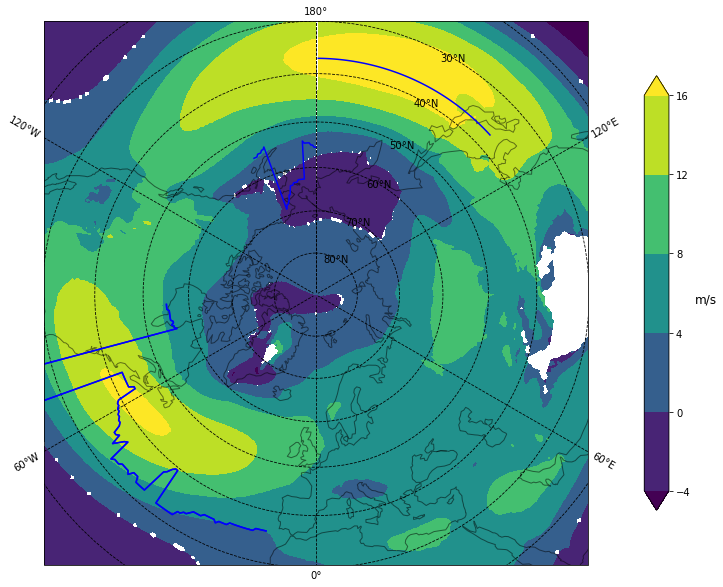

In [139]:
#f = nc.Dataset('ElNino_LowSICYears-WindSpeed-10deg_detrended-data_700hPa.nc', 'r')
#lat= f.variables['lat']
#lon=f.variables['lon']
#wind=f.variables['U'][0,:]     ## 700 hpa 

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-179,179,30,90],ccrs.PlateCarree())
speed_list=[]

file = 'Climatological-WindSpeed_1980-2020_700hPa.nc'
f = nc.Dataset(file, 'r')
#print(f)
clim_lat_list=[]
clim_lon_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
lons,lats= np.meshgrid(lon,lat)


ref_lat=np.linspace(10,90,161)
ref_lon=np.linspace(0,360,576)
ref_grid = xr.DataArray(np.zeros((161,576)),coords=[('lat',ref_lat),('lon',ref_lon)])
x_new = ref_grid.lon.values
#print(x_new)
y_new = ref_grid.lat.values

x_old = lon
y_old = lat
z_old = f['U'][0,:,:]

f_interp = interp2d(x_old,y_old,z_old)
test = f_interp(x_new,y_new)
print(lon[500:576])

for i in range(500,576):  ##len(lon)
    wind=test[:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    clim_lat_coord = f.variables['lat'][result[0]]
    clim_lat_coord=clim_lat_coord.compressed()
    clim_lat_coord = clim_lat_coord[0]
    clim_lat_list.append(clim_lat_coord)
    clim_lon_list=lon[500:576]
    
plt.plot(clim_lon_list, clim_lat_list, color='blue', transform=ccrs.PlateCarree())    

clim_lat_list=[]
clim_lon_list=[]
for i in range(0,40):  ##len(lon)
    wind=test[:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    clim_lat_coord = f.variables['lat'][result[0]]
    clim_lat_coord=clim_lat_coord.compressed()
    clim_lat_coord = clim_lat_coord[0]
    clim_lat_list.append(clim_lat_coord)
    clim_lon_list=lon[0:40]
    
plt.plot(clim_lon_list, clim_lat_list, color='blue', transform=ccrs.PlateCarree())

clim_lat_list=[]
clim_lon_list=[]
for i in range(150,270):  ##len(lon)
    wind=test[:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    clim_lat_coord = f.variables['lat'][result[0]]
    clim_lat_coord=clim_lat_coord.compressed()
    clim_lat_coord = clim_lat_coord[0]
    clim_lat_list.append(clim_lat_coord)
    clim_lon_list=lon[150:270]
    
plt.plot(clim_lon_list, clim_lat_list, color='blue', transform=ccrs.PlateCarree())
 
    
#na_lowsic_lat_list = lowsic_lat_list[150:270]
#na_lowsic_lon_list = lowsic_lon_list[150:270]
#np_lowsic_lat_list=lowsic_lat_list[525:576]
#np_lowsic_lon_list=lowsic_lon_list[525:576]
#np2_lowsic_lat_list=lowsic_lat_list[0:40]
#np2_lowsic_lon_list=lowsic_lon_list[0:40]

na_clim_lat_list=clim_lat_list[150:270]
na_clim_lon_list=clim_lon_list[150:270]
np_clim_lat_list=clim_lat_list[500:576]
np_clim_lon_list=clim_lon_list[500:576]
np2_clim_lat_list=clim_lat_list[0:40]
np2_clim_lon_list=clim_lon_list[0:40]

#plt.plot(na_lowsic_lon_list, na_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
#plt.plot(np_lowsic_lon_list, np_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
#plt.plot(np2_lowsic_lon_list, np2_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(clim_lon_list, clim_lat_list, color='blue', transform=ccrs.PlateCarree())
#plt.plot(np_clim_lon_list, np_clim_lat_list, color='blue', transform=ccrs.PlateCarree())
#plt.plot(np2_clim_lon_list, np2_clim_lat_list, color='blue', transform=ccrs.PlateCarree())



wind=f.variables['U'][0,:,:]     ## 700 hpa
#levels=np.linspace(-16, 16, 17)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),extend='both')
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)

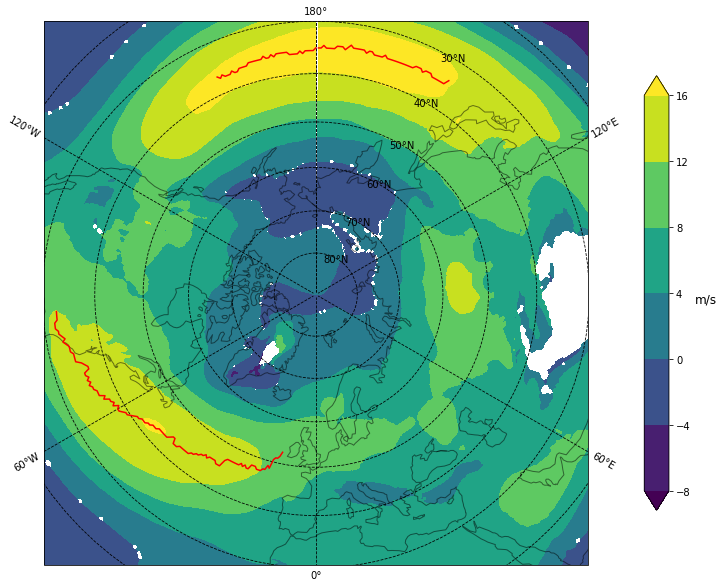

In [93]:
f = nc.Dataset('EPNino-LowSIC_WindSpeed-10deg_detrended-data_700hPa.nc', 'r')
lat= f.variables['lat']
lon=f.variables['lon']
wind=f.variables['U'][:,:]     ## 700 hpa 


lons,lats= np.meshgrid(lon,lat)

lowsic_lat_list=[]
lowsic_lon_list=[]
speed_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
lowsic_lon_list=lon[:]
wind=f.variables['U'][:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    
    lowsic_lat_coord = f.variables['lat'][result[0]]
    lowsic_lat_coord=lowsic_lat_coord.compressed()
    lowsic_lat_coord = lowsic_lat_coord[0]

    lowsic_lat_list.append(lowsic_lat_coord)

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-179,179,30,90],ccrs.PlateCarree())
speed_list=[] 
    
na_lowsic_lat_list = lowsic_lat_list[150:270]
na_lowsic_lon_list = lowsic_lon_list[150:270]
np_lowsic_lat_list=lowsic_lat_list[525:576]
np_lowsic_lon_list=lowsic_lon_list[525:576]
np2_lowsic_lat_list=lowsic_lat_list[0:40]
np2_lowsic_lon_list=lowsic_lon_list[0:40]

#na_clim_lat_list=clim_lat_list[150:270]
#na_clim_lon_list=clim_lon_list[150:270]
#np_clim_lat_list=clim_lat_list[520:576]
#np_clim_lon_list=clim_lon_list[520:576]
#np2_clim_lat_list=clim_lat_list[0:40]
#np2_clim_lon_list=clim_lon_list[0:40]

plt.plot(na_lowsic_lon_list, na_lowsic_lat_list, color='red', transform=ccrs.PlateCarree())
plt.plot(np_lowsic_lon_list, np_lowsic_lat_list, color='red', transform=ccrs.PlateCarree())
plt.plot(np2_lowsic_lon_list, np2_lowsic_lat_list, color='red', transform=ccrs.PlateCarree())
#plt.plot(na_clim_lon_list, na_clim_lat_list, color='blue', transform=ccrs.PlateCarree())
#plt.plot(np_clim_lon_list, np_clim_lat_list, color='blue', transform=ccrs.PlateCarree())
#plt.plot(np2_clim_lon_list, np2_clim_lat_list, color='blue', transform=ccrs.PlateCarree())

wind=f.variables['U'][:,:]  
levels=np.linspace(-16, 16, 17)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),extend='both')
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)

f.close()

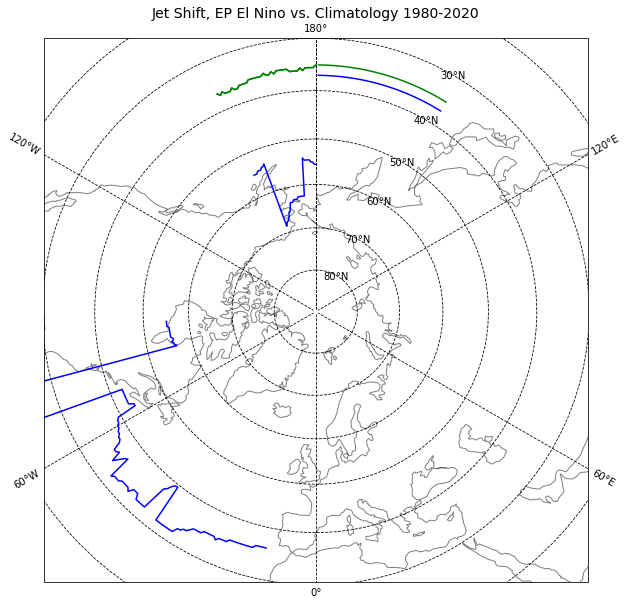

In [211]:
f = nc.Dataset('EPNino-LowSIC_WindSpeed-10deg_detrended-data_700hPa.nc', 'r')
lat= f.variables['lat']
lon=f.variables['lon']
wind=f.variables['U'][0,:]     ## 700 hpa 

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-179,179,30,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)

lowsic_lat_list=[]
lowsic_lon_list=[]
speed_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
lowsic_lon_list=lon[:]
wind=f.variables['U'][:,:]     ## 700 hpa 


ref_lat=np.linspace(10,90,161)
ref_lon=np.linspace(0,360,721)
ref_grid = xr.DataArray(np.zeros((161,721)),coords=[('lat',ref_lat),('lon',ref_lon)])
x_new = ref_grid.lon.values
#print(x_new)
y_new = ref_grid.lat.values

x_old = lon
y_old = lat
z_old = f['U'][:,:]

f_interp = interp2d(x_old,y_old,z_old)
test = f_interp(x_new,y_new)

for i in range(525,576):  ##len(lon)
    wind=test[:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    
    lowsic_lat_coord = f.variables['lat'][result[0]]
    lowsic_lat_coord=lowsic_lat_coord.compressed()
    lowsic_lat_coord = lowsic_lat_coord[0]

    lowsic_lat_list.append(lowsic_lat_coord)
lowsic_lon_list=lon[525:576]
plt.plot(lowsic_lon_list, lowsic_lat_list, color='green', transform=ccrs.PlateCarree())

lowsic_lat_list=[]
lowsic_lon_list=[]
for i in range(0,40):  ##len(lon)
    wind=f.variables['U'][:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    
    lowsic_lat_coord = f.variables['lat'][result[0]]
    lowsic_lat_coord=lowsic_lat_coord.compressed()
    lowsic_lat_coord = lowsic_lat_coord[0]

    lowsic_lat_list.append(lowsic_lat_coord)
lowsic_lon_list=lon[0:40]
plt.plot(lowsic_lon_list, lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
f.close()
#lowsic_lon_list=lon[:]
file = 'Climatological-WindSpeed_1980-2020_700hPa.nc'
f = nc.Dataset(file, 'r')
#print(f)
neut_lat_list=[]
neut_lon_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
neut_lon_list=lon[:]
wind=f.variables['U'][0,:,:]     ## 700 hpa 

ref_lat=np.linspace(10,90,161)
ref_lon=np.linspace(0,360,576)
ref_grid = xr.DataArray(np.zeros((161,576)),coords=[('lat',ref_lat),('lon',ref_lon)])
x_new = ref_grid.lon.values
#print(x_new)
y_new = ref_grid.lat.values

x_old = lon
y_old = lat
z_old = f['U'][0,:,:]

f_interp = interp2d(x_old,y_old,z_old)
test = f_interp(x_new,y_new)

for i in range(0,len(lon)):  ##len(lon)
    wind=test[:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    neut_lat_coord = f.variables['lat'][result[0]]
    neut_lat_coord=neut_lat_coord.compressed()
    neut_lat_coord = neut_lat_coord[0]
    neut_lat_list.append(neut_lat_coord)


na_lowsic_lat_list = lowsic_lat_list[150:270]
na_lowsic_lon_list = lowsic_lon_list[150:270]
np_lowsic_lat_list=lowsic_lat_list[525:576]
np_lowsic_lon_list=lowsic_lon_list[525:576]
np2_lowsic_lat_list=lowsic_lat_list[0:40]
np2_lowsic_lon_list=lowsic_lon_list[0:40]

na_neut_lat_list=neut_lat_list[150:270]
na_neut_lon_list=neut_lon_list[150:270]
np_neut_lat_list=neut_lat_list[525:576]
np_neut_lon_list=neut_lon_list[525:576]
np2_neut_lat_list=neut_lat_list[0:40]
np2_neut_lon_list=neut_lon_list[0:40]

plt.plot(na_lowsic_lon_list, na_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np_lowsic_lon_list, np_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np2_lowsic_lon_list, np2_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(na_neut_lon_list, na_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np_neut_lon_list, np_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np2_neut_lon_list, np2_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.title('Jet Shift, EP El Nino vs. Climatology 1980-2020',size=14)

f1 = nc.Dataset('EPNino-LowSIC_WindSpeed-10deg_detrended-data_700hPa.nc', 'r')
wind1=f1.variables['U'][:,:] 
f2=nc.Dataset('Climatological-WindSpeed_1980-2020_700hPa.nc','r')
wind2=f2.variables['U'][0,:,:] 

wind=wind1-wind2
#levels=np.linspace(-6, 6, 13)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
#cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
#cb.set_label('m/s',size=12,rotation=0,labelpad=15)

## Jet Shift - EP/CP Nino 

Text(0.5, 1.0, 'Jet Shift, EP El Nino & Low SIC vs. Climatology 1980-2020')

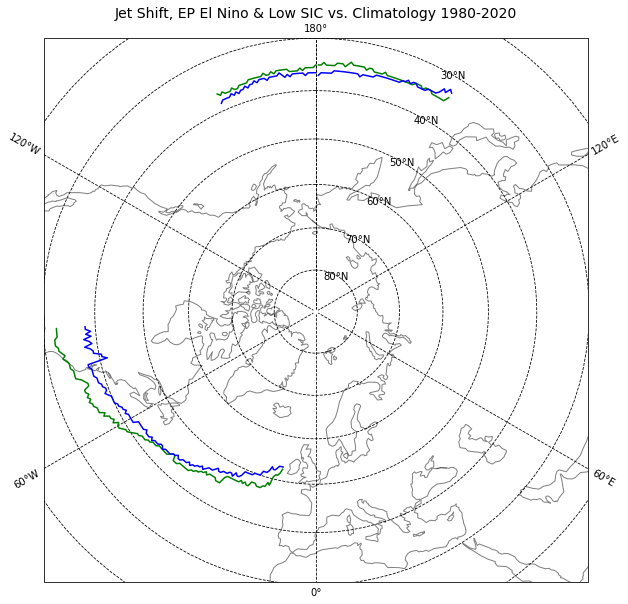

In [180]:
f = nc.Dataset('EPNino-LowSIC_WindSpeed-10deg_detrended-data_700hPa.nc', 'r')
lat= f.variables['lat']
lon=f.variables['lon']
wind=f.variables['U'][0,:]     ## 700 hpa 

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-179,179,30,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)

lowsic_lat_list=[]
lowsic_lon_list=[]
speed_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
lowsic_lon_list=lon[:]
wind=f.variables['U'][:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    
    lowsic_lat_coord = f.variables['lat'][result[0]]
    lowsic_lat_coord=lowsic_lat_coord.compressed()
    lowsic_lat_coord = lowsic_lat_coord[0]

    lowsic_lat_list.append(lowsic_lat_coord)
f.close()

file = 'Climatological-WindSpeed_1980-2020_700hPa.nc'
f = nc.Dataset(file, 'r')
#print(f)
neut_lat_list=[]
neut_lon_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
neut_lon_list=lon[:]
wind=f.variables['U'][0,:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][0,:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    neut_lat_coord = f.variables['lat'][result[0]]
    neut_lat_coord=neut_lat_coord.compressed()
    neut_lat_coord = neut_lat_coord[0]
    neut_lat_list.append(neut_lat_coord)


na_lowsic_lat_list = lowsic_lat_list[150:270]
na_lowsic_lon_list = lowsic_lon_list[150:270]
np_lowsic_lat_list=lowsic_lat_list[525:576]
np_lowsic_lon_list=lowsic_lon_list[525:576]
np2_lowsic_lat_list=lowsic_lat_list[0:40]
np2_lowsic_lon_list=lowsic_lon_list[0:40]

na_neut_lat_list=neut_lat_list[150:270]
na_neut_lon_list=neut_lon_list[150:270]
np_neut_lat_list=neut_lat_list[525:576]
np_neut_lon_list=neut_lon_list[525:576]
np2_neut_lat_list=neut_lat_list[0:40]
np2_neut_lon_list=neut_lon_list[0:40]

plt.plot(na_lowsic_lon_list, na_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np_lowsic_lon_list, np_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np2_lowsic_lon_list, np2_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(na_neut_lon_list, na_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np_neut_lon_list, np_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np2_neut_lon_list, np2_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.title('Jet Shift, EP El Nino & Low SIC vs. Climatology 1980-2020',size=14)

Text(0.5, 1.0, 'Jet Shift, CP El Nino & Low SIC vs. Climatology 1980-2020')

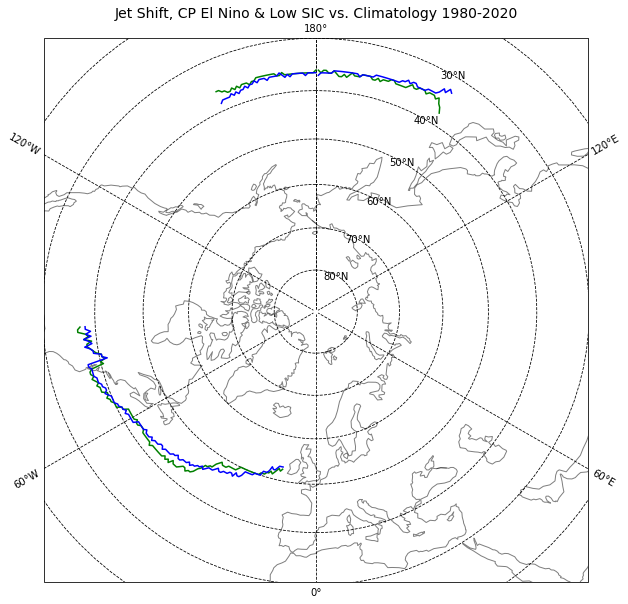

In [181]:
f = nc.Dataset('CPNino-LowSIC_WindSpeed-10deg_detrended-data_700hPa.nc', 'r')
lat= f.variables['lat']
lon=f.variables['lon']
wind=f.variables['U'][0,:]     ## 700 hpa 

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-179,179,30,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)

lowsic_lat_list=[]
lowsic_lon_list=[]
speed_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
lowsic_lon_list=lon[:]
wind=f.variables['U'][:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    
    lowsic_lat_coord = f.variables['lat'][result[0]]
    lowsic_lat_coord=lowsic_lat_coord.compressed()
    lowsic_lat_coord = lowsic_lat_coord[0]

    lowsic_lat_list.append(lowsic_lat_coord)
f.close()

file = 'Climatological-WindSpeed_1980-2020_700hPa.nc'
f = nc.Dataset(file, 'r')
#print(f)
neut_lat_list=[]
neut_lon_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
neut_lon_list=lon[:]
wind=f.variables['U'][0,:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][0,:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    neut_lat_coord = f.variables['lat'][result[0]]
    neut_lat_coord=neut_lat_coord.compressed()
    neut_lat_coord = neut_lat_coord[0]
    neut_lat_list.append(neut_lat_coord)


na_lowsic_lat_list = lowsic_lat_list[150:270]
na_lowsic_lon_list = lowsic_lon_list[150:270]
np_lowsic_lat_list=lowsic_lat_list[525:576]
np_lowsic_lon_list=lowsic_lon_list[525:576]
np2_lowsic_lat_list=lowsic_lat_list[0:40]
np2_lowsic_lon_list=lowsic_lon_list[0:40]

na_neut_lat_list=neut_lat_list[150:270]
na_neut_lon_list=neut_lon_list[150:270]
np_neut_lat_list=neut_lat_list[525:576]
np_neut_lon_list=neut_lon_list[525:576]
np2_neut_lat_list=neut_lat_list[0:40]
np2_neut_lon_list=neut_lon_list[0:40]

plt.plot(na_lowsic_lon_list, na_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np_lowsic_lon_list, np_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np2_lowsic_lon_list, np2_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(na_neut_lon_list, na_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np_neut_lon_list, np_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np2_neut_lon_list, np2_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.title('Jet Shift, CP El Nino & Low SIC vs. Climatology 1980-2020',size=14)

Text(0.5, 1.0, 'Jet Shift, EP El Nino vs. Climatology 1980-2020')

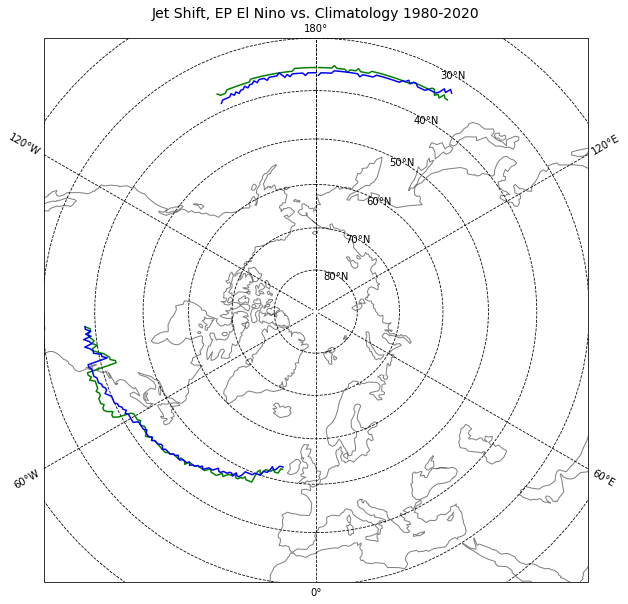

In [182]:
f = nc.Dataset('EPNino_WindSpeed-10deg_detrended-data_700hPa.nc', 'r')
lat= f.variables['lat']
lon=f.variables['lon']
wind=f.variables['U'][0,:]     ## 700 hpa 

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-179,179,30,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)

lowsic_lat_list=[]
lowsic_lon_list=[]
speed_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
lowsic_lon_list=lon[:]
wind=f.variables['U'][:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    
    lowsic_lat_coord = f.variables['lat'][result[0]]
    lowsic_lat_coord=lowsic_lat_coord.compressed()
    lowsic_lat_coord = lowsic_lat_coord[0]

    lowsic_lat_list.append(lowsic_lat_coord)
f.close()

file = 'Climatological-WindSpeed_1980-2020_700hPa.nc'
f = nc.Dataset(file, 'r')
#print(f)
neut_lat_list=[]
neut_lon_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
neut_lon_list=lon[:]
wind=f.variables['U'][0,:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][0,:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    neut_lat_coord = f.variables['lat'][result[0]]
    neut_lat_coord=neut_lat_coord.compressed()
    neut_lat_coord = neut_lat_coord[0]
    neut_lat_list.append(neut_lat_coord)


na_lowsic_lat_list = lowsic_lat_list[150:270]
na_lowsic_lon_list = lowsic_lon_list[150:270]
np_lowsic_lat_list=lowsic_lat_list[525:576]
np_lowsic_lon_list=lowsic_lon_list[525:576]
np2_lowsic_lat_list=lowsic_lat_list[0:40]
np2_lowsic_lon_list=lowsic_lon_list[0:40]

na_neut_lat_list=neut_lat_list[150:270]
na_neut_lon_list=neut_lon_list[150:270]
np_neut_lat_list=neut_lat_list[525:576]
np_neut_lon_list=neut_lon_list[525:576]
np2_neut_lat_list=neut_lat_list[0:40]
np2_neut_lon_list=neut_lon_list[0:40]

plt.plot(na_lowsic_lon_list, na_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np_lowsic_lon_list, np_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np2_lowsic_lon_list, np2_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(na_neut_lon_list, na_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np_neut_lon_list, np_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np2_neut_lon_list, np2_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.title('Jet Shift, EP El Nino vs. Climatology 1980-2020',size=14)

Text(0.5, 1.0, 'Jet Shift, EP El Nino vs. Climatology 1980-2020')

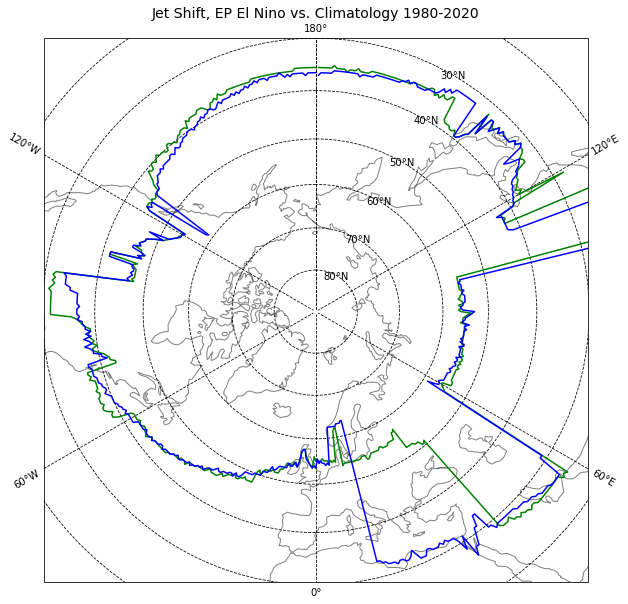

In [190]:
f = nc.Dataset('EPNino_WindSpeed-10deg_detrended-data_700hPa.nc', 'r')
lat= f.variables['lat']
lon=f.variables['lon']
wind=f.variables['U'][0,:]     ## 700 hpa 

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-179,179,30,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)

lowsic_lat_list=[]
lowsic_lon_list=[]
speed_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
lowsic_lon_list=lon[:]
wind=f.variables['U'][:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    
    lowsic_lat_coord = f.variables['lat'][result[0]]
    lowsic_lat_coord=lowsic_lat_coord.compressed()
    lowsic_lat_coord = lowsic_lat_coord[0]

    lowsic_lat_list.append(lowsic_lat_coord)
plt.plot(lowsic_lon_list,lowsic_lat_list,color='green',transform=ccrs.PlateCarree())
f.close()

file = 'Climatological-WindSpeed_1980-2020_700hPa.nc'
f = nc.Dataset(file, 'r')
#print(f)
neut_lat_list=[]
neut_lon_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
neut_lon_list=lon[:]
wind=f.variables['U'][0,:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][0,:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    neut_lat_coord = f.variables['lat'][result[0]]
    neut_lat_coord=neut_lat_coord.compressed()
    neut_lat_coord = neut_lat_coord[0]
    neut_lat_list.append(neut_lat_coord)

plt.plot(neut_lon_list,neut_lat_list,color='blue',transform=ccrs.PlateCarree())

na_lowsic_lat_list = lowsic_lat_list[150:270]
na_lowsic_lon_list = lowsic_lon_list[150:270]
np_lowsic_lat_list=lowsic_lat_list[525:576]
np_lowsic_lon_list=lowsic_lon_list[525:576]
np2_lowsic_lat_list=lowsic_lat_list[0:40]
np2_lowsic_lon_list=lowsic_lon_list[0:40]

na_neut_lat_list=neut_lat_list[150:270]
na_neut_lon_list=neut_lon_list[150:270]
np_neut_lat_list=neut_lat_list[525:576]
np_neut_lon_list=neut_lon_list[525:576]
np2_neut_lat_list=neut_lat_list[0:40]
np2_neut_lon_list=neut_lon_list[0:40]

#plt.plot(na_lowsic_lon_list, na_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
#plt.plot(np_lowsic_lon_list, np_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
#plt.plot(np2_lowsic_lon_list, np2_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
#plt.plot(na_neut_lon_list, na_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
#plt.plot(np_neut_lon_list, np_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
#plt.plot(np2_neut_lon_list, np2_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.title('Jet Shift, EP El Nino vs. Climatology 1980-2020',size=14)

Text(0.5, 1.0, 'Jet Shift, CP El Nino vs. Climatology 1980-2020')

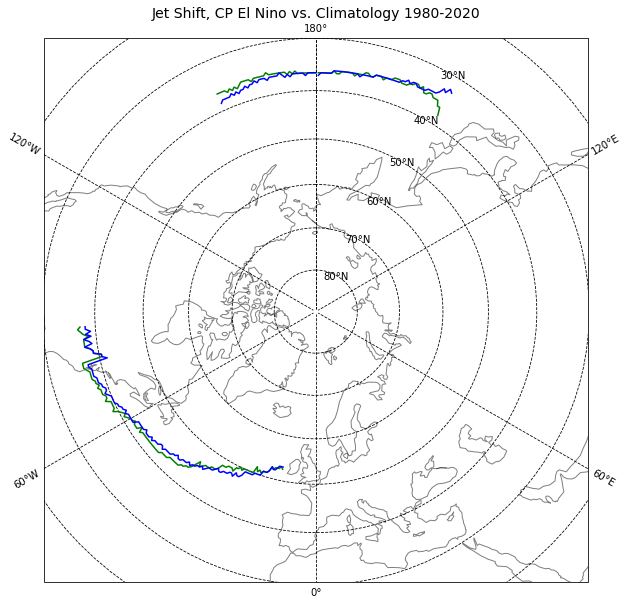

In [183]:
f = nc.Dataset('CPNino_WindSpeed-10deg_detrended-data_700hPa.nc', 'r')
lat= f.variables['lat']
lon=f.variables['lon']
wind=f.variables['U'][0,:]     ## 700 hpa 

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-179,179,30,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)

lowsic_lat_list=[]
lowsic_lon_list=[]
speed_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
lowsic_lon_list=lon[:]
wind=f.variables['U'][:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    
    lowsic_lat_coord = f.variables['lat'][result[0]]
    lowsic_lat_coord=lowsic_lat_coord.compressed()
    lowsic_lat_coord = lowsic_lat_coord[0]

    lowsic_lat_list.append(lowsic_lat_coord)
f.close()

file = 'Climatological-WindSpeed_1980-2020_700hPa.nc'
f = nc.Dataset(file, 'r')
#print(f)
neut_lat_list=[]
neut_lon_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
neut_lon_list=lon[:]
wind=f.variables['U'][0,:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][0,:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    neut_lat_coord = f.variables['lat'][result[0]]
    neut_lat_coord=neut_lat_coord.compressed()
    neut_lat_coord = neut_lat_coord[0]
    neut_lat_list.append(neut_lat_coord)


na_lowsic_lat_list = lowsic_lat_list[150:270]
na_lowsic_lon_list = lowsic_lon_list[150:270]
np_lowsic_lat_list=lowsic_lat_list[525:576]
np_lowsic_lon_list=lowsic_lon_list[525:576]
np2_lowsic_lat_list=lowsic_lat_list[0:40]
np2_lowsic_lon_list=lowsic_lon_list[0:40]

na_neut_lat_list=neut_lat_list[150:270]
na_neut_lon_list=neut_lon_list[150:270]
np_neut_lat_list=neut_lat_list[525:576]
np_neut_lon_list=neut_lon_list[525:576]
np2_neut_lat_list=neut_lat_list[0:40]
np2_neut_lon_list=neut_lon_list[0:40]

plt.plot(na_lowsic_lon_list, na_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np_lowsic_lon_list, np_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np2_lowsic_lon_list, np2_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(na_neut_lon_list, na_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np_neut_lon_list, np_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np2_neut_lon_list, np2_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.title('Jet Shift, CP El Nino vs. Climatology 1980-2020',size=14)


# Interpolation 

In [2]:
## interpolate to a finer grid to get smoother jet lines
i=1980
file='WindSpeed-{}.nc'.format(i)
f = nc.Dataset(file, 'r')
#print(f)
x_old = f['lon']
y_old = f['lat']
z_old = f


ref_lat=np.linspace(10,90,401)
ref_lon=np.linspace(0,360,1441)
ref_grid = xr.DataArray(np.zeros((401,1441)),coords=[('lat',ref_lat),('lon',ref_lon)])
x_new = ref_grid.lon.values
#print(x_new)
y_new = ref_grid.lat.values

x_old = f['lon']
y_old=f['lat']
z_old=f['U'][0,0,:,:]


fout = nc.Dataset('test_interp-1.nc', 'r+')
#fout.createDimension('time', None)
#fout.createDimension('y', len(y_new))
#fout.createDimension('x', len(x_new))
#fout.createDimension('level',len(f['lev']))
#lats = fout.createVariable('lat', float, ('y', ), zlib=True)
#lons = fout.createVariable('lon', float, ('x', ), zlib=True)
#levs = fout.createVariable('lev',float, ('level', ), zlib= True)
#wind = fout.createVariable('U', float, ('level','y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)
print(fout)
f_interp = interp2d(x_old,y_old,z_old)
test = f_interp(x_new,y_new)
print(test.shape)
#test.shape=(y_new,x_new)
fout['lat'][:] = y_new
fout['lon'][:] = x_new
fout['U'][0,:,:] = test
print(test)
fout.close()

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): time(0), y(401), x(1441), level(2)
    variables(dimensions): float64 lat(y), float64 lon(x), float64 lev(level), float64 U(level, y, x)
    groups: 
(401, 1441)
[[    nan     nan     nan ... -4.     -4.     -4.    ]
 [    nan     nan     nan ... -3.8    -3.8    -3.8   ]
 [    nan     nan     nan ... -3.6    -3.6    -3.6   ]
 ...
 [-4.2875 -4.2875 -4.2875 ...  4.025   4.025   4.025 ]
 [-4.2375 -4.2375 -4.2375 ...  4.075   4.075   4.075 ]
 [-4.1875 -4.1875 -4.1875 ...  4.125   4.125   4.125 ]]


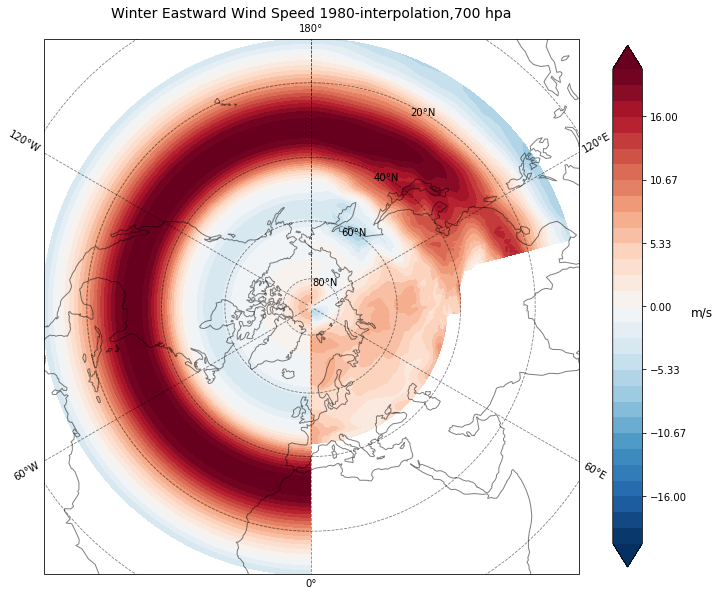

In [3]:
file1 = 'test_interp-1.nc'
ds1 = xr.open_mfdataset(file1)   

lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind=ds1['U'][0,:,:]  ## 



fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-20, 20, 31)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('Winter Eastward Wind Speed 1980-interpolation,700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

In [4]:
## interpolate to a finer grid to get smoother jet lines
i=1981
file='WindSpeed-{}.nc'.format(i)
f = nc.Dataset(file, 'r')
#print(f)
x_old = f['lon']
y_old = f['lat']
z_old = f


ref_lat=np.linspace(10,90,401)
ref_lon=np.linspace(0,360,1441)
ref_grid = xr.DataArray(np.zeros((401,1441)),coords=[('lat',ref_lat),('lon',ref_lon)])
x_new = ref_grid.lon.values
#print(x_new)
y_new = ref_grid.lat.values

x_old = f['lon']
y_old=f['lat']
z_old=f['U'][0,0,:,:]


fout = nc.Dataset('test_interp-1981.nc', 'w')
fout.createDimension('time', None)
fout.createDimension('y', len(y_new))
fout.createDimension('x', len(x_new))
fout.createDimension('level',len(f['lev']))
lats = fout.createVariable('lat', float, ('y', ), zlib=True)
lons = fout.createVariable('lon', float, ('x', ), zlib=True)
levs = fout.createVariable('lev',float, ('level', ), zlib= True)
wind = fout.createVariable('U', float, ('level','y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)
print(fout)
f_interp = interp2d(x_old,y_old,z_old)
test = f_interp(x_new,y_new)
print(test.shape)
#test.shape=(y_new,x_new)
fout['lat'][:] = y_new
fout['lon'][:] = x_new
fout['U'][0,:,:] = test
print(test)
fout.close()

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): time(0), y(401), x(1441), level(2)
    variables(dimensions): float64 lat(y), float64 lon(x), float64 lev(level), float64 U(level, y, x)
    groups: 
(401, 1441)
[[    nan     nan     nan ... -6.4375 -6.4375 -6.4375]
 [    nan     nan     nan ... -6.4125 -6.4125 -6.4125]
 [    nan     nan     nan ... -6.3875 -6.3875 -6.3875]
 ...
 [-2.8125 -2.8125 -2.8125 ...  3.3     3.3     3.3   ]
 [-2.9375 -2.9375 -2.9375 ...  3.15    3.15    3.15  ]
 [-3.0625 -3.0625 -3.0625 ...  3.      3.      3.    ]]


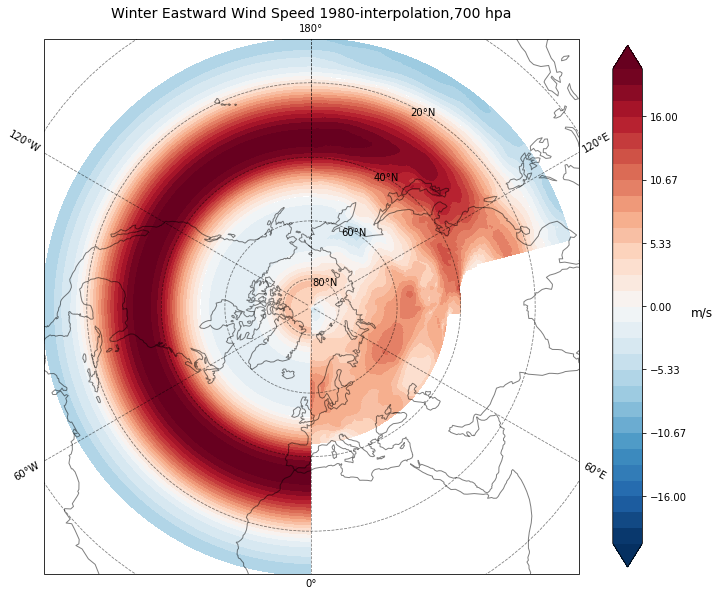

In [5]:
file1 = 'test_interp-1981.nc'
ds1 = xr.open_mfdataset(file1)   

lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind=ds1['U'][0,:,:]  ## 



fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-20, 20, 31)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('Winter Eastward Wind Speed 1980-interpolation,700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

In [14]:
## interpolate to a finer grid to get smoother jet lines
i=1991
file='WindSpeed-{}.nc'.format(i)
f = nc.Dataset(file, 'r')
#print(f)
x_old = f['lon']
y_old = f['lat']
z_old = f


ref_lat=np.linspace(10,90,201)
ref_lon=np.linspace(0,360,721)
ref_grid = xr.DataArray(np.zeros((201,721)),coords=[('lat',ref_lat),('lon',ref_lon)])
x_new = ref_grid.lon.values
#print(x_new)
y_new = ref_grid.lat.values

x_old = f['lon']
y_old=f['lat']
z_old=f['U'][0,0,:,:]


fout = nc.Dataset('test_interp-1991-1.nc', 'w')
fout.createDimension('time', None)
fout.createDimension('y', len(y_new))
fout.createDimension('x', len(x_new))
fout.createDimension('level',len(f['lev']))
lats = fout.createVariable('lat', float, ('y', ), zlib=True)
lons = fout.createVariable('lon', float, ('x', ), zlib=True)
levs = fout.createVariable('lev',float, ('level', ), zlib= True)
wind = fout.createVariable('U', float, ('level','y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)
print(fout)
f_interp = interp2d(x_old,y_old,z_old)
test = f_interp(x_new,y_new)
print(test.shape)
#test.shape=(y_new,x_new)
fout['lat'][:] = y_new
fout['lon'][:] = x_new
fout['U'][0,:,:] = test
print(test)
fout.close()

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): time(0), y(201), x(721), level(2)
    variables(dimensions): float64 lat(y), float64 lon(x), float64 lev(level), float64 U(level, y, x)
    groups: 
(201, 721)
[[    nan     nan     nan ... -3.5    -3.5    -3.5   ]
 [    nan     nan     nan ... -3.25   -3.25   -3.25  ]
 [    nan     nan     nan ... -3.0375 -3.0375 -3.0375]
 ...
 [-3.1375 -3.1375 -3.115  ...  3.8125  3.8125  3.8125]
 [-2.9125 -2.9125 -2.9125 ...  3.2125  3.2125  3.2125]
 [-3.0625 -3.0625 -3.0625 ...  3.0625  3.0625  3.0625]]


<xarray.Dataset>
Dimensions:  (level: 2, x: 721, y: 201)
Dimensions without coordinates: level, x, y
Data variables:
    lat      (y) float64 dask.array<chunksize=(201,), meta=np.ndarray>
    lon      (x) float64 dask.array<chunksize=(721,), meta=np.ndarray>
    lev      (level) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    U        (level, y, x) float64 dask.array<chunksize=(2, 201, 721), meta=np.ndarray>


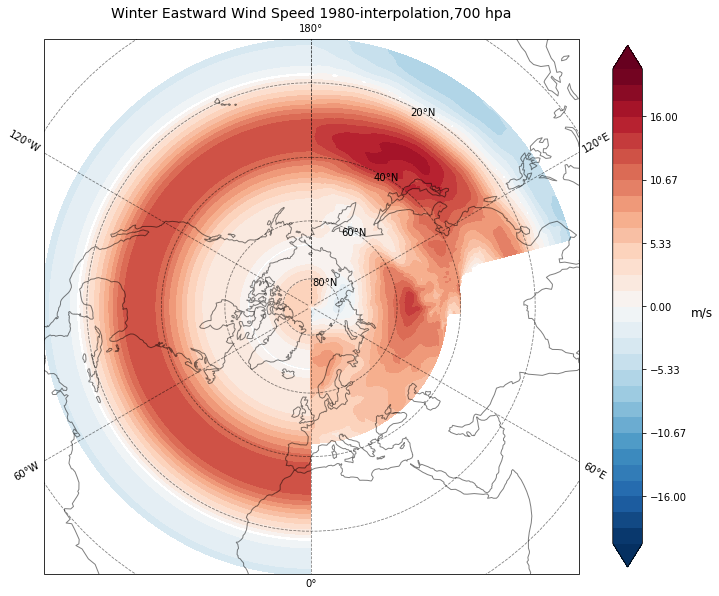

In [15]:
file1 = 'test_interp-1991-1.nc'
ds1 = xr.open_mfdataset(file1)   

print(ds1)
lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind=ds1['U'][0,:,:]  ## 



fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-20, 20, 31)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('Winter Eastward Wind Speed 1980-interpolation,700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

In [16]:
## interpolate to a finer grid to get smoother jet lines
i=1991
file='WindSpeed-{}.nc'.format(i)
f = nc.Dataset(file, 'r')
#print(f)
x_old = f['lon']
y_old = f['lat']
z_old = f


ref_lat=np.linspace(10,90,121)
ref_lon=np.linspace(0,360,541)
ref_grid = xr.DataArray(np.zeros((121,541)),coords=[('lat',ref_lat),('lon',ref_lon)])
x_new = ref_grid.lon.values
#print(x_new)
y_new = ref_grid.lat.values

x_old = f['lon']
y_old=f['lat']
z_old=f['U'][0,0,:,:]


fout = nc.Dataset('test_interp-1991-2.nc', 'w')
fout.createDimension('time', None)
fout.createDimension('y', len(y_new))
fout.createDimension('x', len(x_new))
fout.createDimension('level',len(f['lev']))
lats = fout.createVariable('lat', float, ('y', ), zlib=True)
lons = fout.createVariable('lon', float, ('x', ), zlib=True)
levs = fout.createVariable('lev',float, ('level', ), zlib= True)
wind = fout.createVariable('U', float, ('level','y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)
print(fout)
f_interp = interp2d(x_old,y_old,z_old)
test = f_interp(x_new,y_new)
print(test.shape)
#test.shape=(y_new,x_new)
fout['lat'][:] = y_new
fout['lon'][:] = x_new
fout['U'][0,:,:] = test
print(test)
fout.close()

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): time(0), y(121), x(541), level(2)
    variables(dimensions): float64 lat(y), float64 lon(x), float64 lev(level), float64 U(level, y, x)
    groups: 
(121, 541)
[[        nan         nan         nan ... -3.5        -3.5
  -3.5       ]
 [        nan         nan         nan ... -3.10416667 -3.10416667
  -3.10416667]
 [        nan         nan         nan ... -2.77083333 -2.77083333
  -2.77083333]
 ...
 [-3.1875     -3.18611111 -3.16111111 ...  4.39583333  4.39583333
   4.39583333]
 [-3.02083333 -3.01944444 -3.         ...  3.5625      3.5625
   3.5625    ]
 [-3.0625     -3.0625     -3.0625     ...  3.0625      3.0625
   3.0625    ]]


<xarray.Dataset>
Dimensions:  (level: 2, x: 541, y: 121)
Dimensions without coordinates: level, x, y
Data variables:
    lat      (y) float64 dask.array<chunksize=(121,), meta=np.ndarray>
    lon      (x) float64 dask.array<chunksize=(541,), meta=np.ndarray>
    lev      (level) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    U        (level, y, x) float64 dask.array<chunksize=(2, 121, 541), meta=np.ndarray>


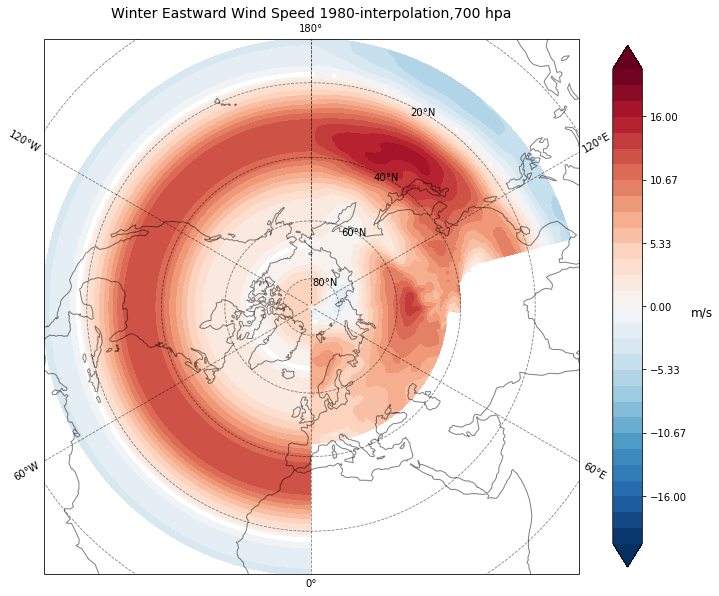

In [17]:
file1 = 'test_interp-1991-2.nc'
ds1 = xr.open_mfdataset(file1)   

print(ds1)
lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind=ds1['U'][0,:,:]  ## 



fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-20, 20, 31)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('Winter Eastward Wind Speed 1980-interpolation,700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

In [20]:
## interpolate to a finer grid to get smoother jet lines
i=1991
file='WindSpeed-{}.nc'.format(i)
f = nc.Dataset(file, 'r')
#print(f)
x_old = f['lon']
y_old = f['lat']
z_old = f


ref_lat=np.linspace(10,90,81)
ref_lon=np.linspace(0,360,361)
ref_grid = xr.DataArray(np.zeros((81,361)),coords=[('lat',ref_lat),('lon',ref_lon)])
x_new = ref_grid.lon.values
#print(x_new)
y_new = ref_grid.lat.values

x_old = f['lon']
y_old=f['lat']
z_old=f['U'][0,0,:,:]


fout = nc.Dataset('test_interp-1991-3.nc', 'w')
fout.createDimension('time', None)
fout.createDimension('y', len(y_new))
fout.createDimension('x', len(x_new))
fout.createDimension('level',len(f['lev']))
lats = fout.createVariable('lat', float, ('y', ), zlib=True)
lons = fout.createVariable('lon', float, ('x', ), zlib=True)
levs = fout.createVariable('lev',float, ('level', ), zlib= True)
wind = fout.createVariable('U', float, ('level','y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)
print(fout)
f_interp = interp2d(x_old,y_old,z_old)
test = f_interp(x_new,y_new)
print(test.shape)
#test.shape=(y_new,x_new)
fout['lat'][:] = y_new
fout['lon'][:] = x_new
fout['U'][0,:,:] = test
print(test)
fout.close()

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): time(0), y(81), x(361), level(2)
    variables(dimensions): float64 lat(y), float64 lon(x), float64 lev(level), float64 U(level, y, x)
    groups: 
(81, 361)
[[    nan     nan     nan ... -3.5    -3.5    -3.5   ]
 [    nan     nan     nan ... -2.9375 -2.9375 -2.9375]
 [    nan     nan     nan ... -2.5    -2.5    -2.5   ]
 ...
 [-2.8125 -2.8125 -2.75   ...  4.75    4.75    4.75  ]
 [-3.3125 -3.275  -3.25   ...  4.1875  4.1875  4.1875]
 [-3.0625 -3.0625 -3.05   ...  3.0625  3.0625  3.0625]]


<xarray.Dataset>
Dimensions:  (level: 2, x: 361, y: 81)
Dimensions without coordinates: level, x, y
Data variables:
    lat      (y) float64 dask.array<chunksize=(81,), meta=np.ndarray>
    lon      (x) float64 dask.array<chunksize=(361,), meta=np.ndarray>
    lev      (level) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    U        (level, y, x) float64 dask.array<chunksize=(2, 81, 361), meta=np.ndarray>


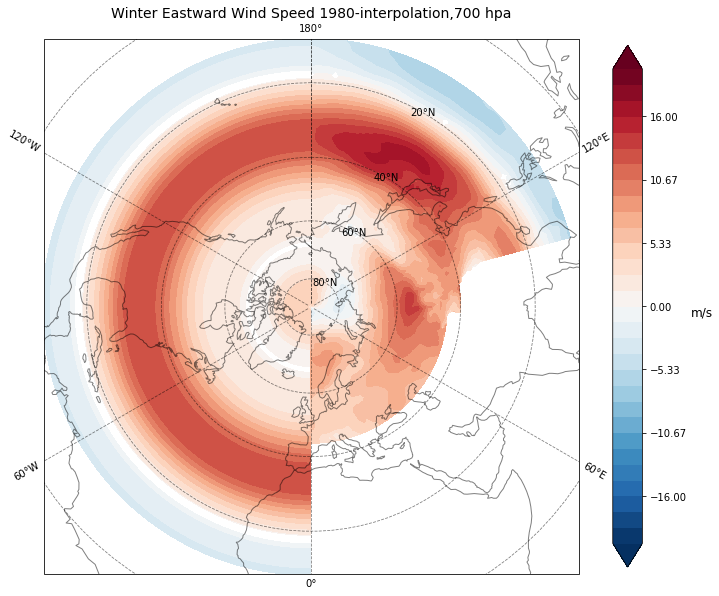

In [21]:
file1 = 'test_interp-1991-3.nc'
ds1 = xr.open_mfdataset(file1)   

print(ds1)
lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind=ds1['U'][0,:,:]  ## 



fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-20, 20, 31)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('Winter Eastward Wind Speed 1980-interpolation,700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

<xarray.Dataset>
Dimensions:  (level: 2, time: 1, x: 576, y: 161)
Coordinates:
  * time     (time) float64 2.02e+03
Dimensions without coordinates: level, x, y
Data variables:
    lat      (y) float64 dask.array<chunksize=(161,), meta=np.ndarray>
    lon      (x) float64 dask.array<chunksize=(576,), meta=np.ndarray>
    lev      (level) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    U        (time, level, y, x) float64 dask.array<chunksize=(1, 2, 161, 576), meta=np.ndarray>


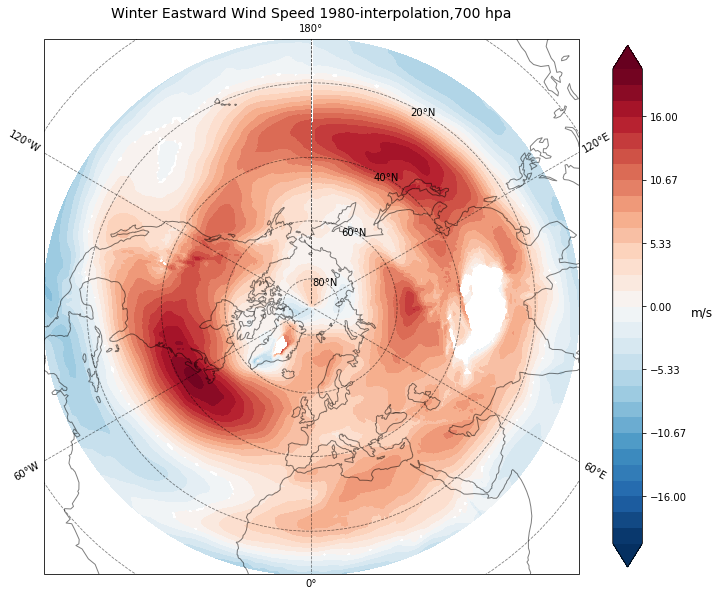

In [23]:
file1 = 'WindSpeed-1991.nc'
ds1 = xr.open_mfdataset(file1)   

print(ds1)
lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind=ds1['U'][0,0,:,:]  ## 



fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-20, 20, 31)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('Winter Eastward Wind Speed 1980-interpolation,700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

In [24]:
## interpolate to a finer grid to get smoother jet lines
i=1991
file='WindSpeed-{}.nc'.format(i)
f = nc.Dataset(file, 'r')
#print(f)
x_old = f['lon']
y_old = f['lat']
z_old = f


ref_lat=np.linspace(10,90,161)
ref_lon=np.linspace(0,360,576)
ref_grid = xr.DataArray(np.zeros((161,576)),coords=[('lat',ref_lat),('lon',ref_lon)])
x_new = ref_grid.lon.values
#print(x_new)
y_new = ref_grid.lat.values

x_old = f['lon']
y_old=f['lat']
z_old=f['U'][0,0,:,:]


fout = nc.Dataset('test_interp-1991-4.nc', 'w')
fout.createDimension('time', None)
fout.createDimension('y', len(y_new))
fout.createDimension('x', len(x_new))
fout.createDimension('level',len(f['lev']))
lats = fout.createVariable('lat', float, ('y', ), zlib=True)
lons = fout.createVariable('lon', float, ('x', ), zlib=True)
levs = fout.createVariable('lev',float, ('level', ), zlib= True)
wind = fout.createVariable('U', float, ('level','y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)
print(fout)
f_interp = interp2d(x_old,y_old,z_old)
test = f_interp(x_new,y_new)
print(test.shape)
#test.shape=(y_new,x_new)
fout['lat'][:] = y_new
fout['lon'][:] = x_new
fout['U'][0,:,:] = test
print(test)
fout.close()

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): time(0), y(161), x(576), level(2)
    variables(dimensions): float64 lat(y), float64 lon(x), float64 lev(level), float64 U(level, y, x)
    groups: 
(161, 576)
[[       nan        nan        nan ... -3.5       -3.5       -3.5      ]
 [       nan        nan        nan ... -3.1875    -3.1875    -3.1875   ]
 [       nan        nan        nan ... -2.9375    -2.9375    -2.9375   ]
 ...
 [-3.3125    -3.3123913 -3.25      ...  4.1875     4.1875     4.1875   ]
 [-2.875     -2.875     -2.875     ...  3.25       3.25       3.25     ]
 [-3.0625    -3.0625    -3.0625    ...  3.0625     3.0625     3.0625   ]]


<xarray.Dataset>
Dimensions:  (level: 2, x: 576, y: 161)
Dimensions without coordinates: level, x, y
Data variables:
    lat      (y) float64 dask.array<chunksize=(161,), meta=np.ndarray>
    lon      (x) float64 dask.array<chunksize=(576,), meta=np.ndarray>
    lev      (level) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    U        (level, y, x) float64 dask.array<chunksize=(2, 161, 576), meta=np.ndarray>


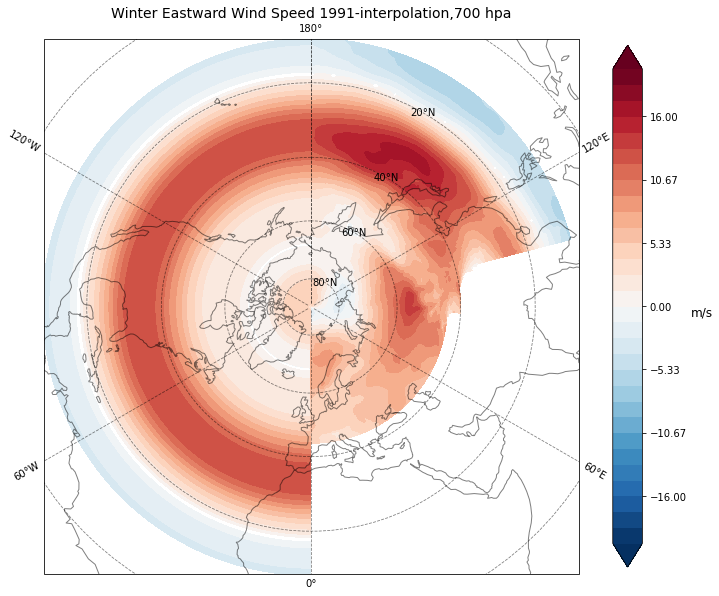

In [43]:
file1 = 'test_interp-1991-4.nc'
ds1 = xr.open_mfdataset(file1)   

print(ds1)
lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind=ds1['U'][0,:,:]  ## 



fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-20, 20, 31)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('Winter Eastward Wind Speed 1991-interpolation,700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

In [34]:

file='EPNino_WindSpeed-10deg_detrended-data_700hPa.nc'
f = nc.Dataset(file, 'r')
print(f)
x_old = f['lon']
y_old = f['lat']
z_old = f


ref_lat=np.linspace(10,90,161)
ref_lon=np.linspace(0,360,576)
ref_grid = xr.DataArray(np.zeros((161,576)),coords=[('lat',ref_lat),('lon',ref_lon)])
x_new = ref_grid.lon.values
#print(x_new)
y_new = ref_grid.lat.values

x_old = f['lon']
y_old=f['lat']
z_old=f['U'][:,:]


fout = nc.Dataset('test_interp-EPNino1.nc', 'w')
fout.createDimension('time', None)
fout.createDimension('y', len(y_new))
fout.createDimension('x', len(x_new))
#fout.createDimension('level',len(f['lev']))
lats = fout.createVariable('lat', float, ('y', ), zlib=True)
lons = fout.createVariable('lon', float, ('x', ), zlib=True)
#levs = fout.createVariable('lev',float, ('level', ), zlib= True)
wind = fout.createVariable('U', float, ('y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)
print(fout)
f_interp = interp2d(x_old,y_old,z_old)
test = f_interp(x_new,y_new)
print(test.shape)
#test.shape=(y_new,x_new)
fout['lat'][:] = y_new
fout['lon'][:] = x_new
fout['U'][:,:] = test
print(test)
fout.close()

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): time(0), y(161), x(576)
    variables(dimensions): float64 lat(y), float64 lon(x), float64 U(y, x)
    groups: 
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): time(0), y(161), x(576)
    variables(dimensions): float64 lat(y), float64 lon(x), float64 U(y, x)
    groups: 
(161, 576)
[[       nan        nan        nan ... -4.75      -4.75      -4.75     ]
 [       nan        nan        nan ... -4.875     -4.875     -4.875    ]
 [       nan        nan        nan ... -5.0625    -5.0625    -5.0625   ]
 ...
 [-2.5       -2.4998913 -2.4375    ...  2.8125     2.8125     2.8125   ]
 [-2.1875    -2.1873913 -2.125     ...  2.25       2.25       2.25     ]
 [-2.1875    -2.1875    -2.1875    ...  2.25       2.25       2.25     ]]


<xarray.Dataset>
Dimensions:  (x: 576, y: 161)
Dimensions without coordinates: x, y
Data variables:
    lat      (y) float64 dask.array<chunksize=(161,), meta=np.ndarray>
    lon      (x) float64 dask.array<chunksize=(576,), meta=np.ndarray>
    U        (y, x) float64 dask.array<chunksize=(161, 576), meta=np.ndarray>


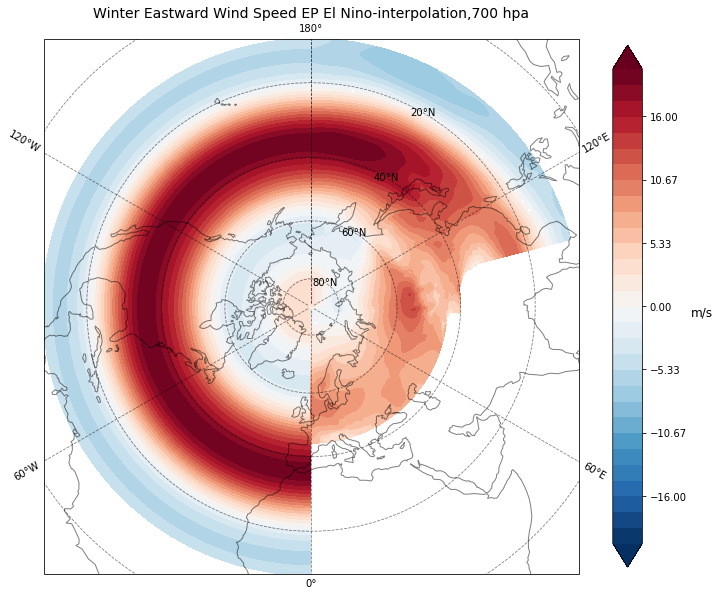

In [38]:
file1 = 'test_interp-EPNino1.nc'
ds1 = xr.open_mfdataset(file1)   

print(ds1)
lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind=ds1['U'][:,:]  ## 



fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-20, 20, 31)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('Winter Eastward Wind Speed EP El Nino-interpolation,700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

In [61]:
file='CPNino_WindSpeed-10deg_detrended-data_700hPa.nc'
f = nc.Dataset(file, 'r')
#print(f)
x_old = f['lon']
y_old = f['lat']
z_old = f


ref_lat=np.linspace(10,90,161)
ref_lon=np.linspace(0,360,576)
ref_grid = xr.DataArray(np.zeros((161,576)),coords=[('lat',ref_lat),('lon',ref_lon)])
x_new = ref_grid.lon.values
#print(x_new)
y_new = ref_grid.lat.values

x_old = f['lon']
y_old=f['lat']
z_old=f['U'][:,:]

print(z_old)

f_interp = interp2d(x_old,y_old,z_old)
test = f_interp(x_new,y_new)
#print(test)

[[-5.0 -4.9375 -4.8125 ... -5.1875 -5.125 -5.0625]
 [-4.875 -4.8125 -4.75 ... -5.125 -5.0625 -5.0]
 [-4.8125 -4.75 -4.625 ... -5.125 -5.0 -4.9375]
 ...
 [1.5625 1.5625 1.5625 ... 1.5625 1.5625 1.5625]
 [1.125 1.125 1.125 ... 1.1875 1.1875 1.125]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]]


In [44]:
file='CPNino_WindSpeed-10deg_detrended-data_700hPa.nc'
f = nc.Dataset(file, 'r')
print(f)
x_old = f['lon']
y_old = f['lat']
z_old = f


ref_lat=np.linspace(10,90,161)
ref_lon=np.linspace(0,360,576)
ref_grid = xr.DataArray(np.zeros((161,576)),coords=[('lat',ref_lat),('lon',ref_lon)])
x_new = ref_grid.lon.values
#print(x_new)
y_new = ref_grid.lat.values

x_old = f['lon']
y_old=f['lat']
z_old=f['U'][:,:]


fout = nc.Dataset('test_interp-CPNino1.nc', 'w')
fout.createDimension('time', None)
fout.createDimension('y', len(y_new))
fout.createDimension('x', len(x_new))
#fout.createDimension('level',len(f['lev']))
lats = fout.createVariable('lat', float, ('y', ), zlib=True)
lons = fout.createVariable('lon', float, ('x', ), zlib=True)
#levs = fout.createVariable('lev',float, ('level', ), zlib= True)
wind = fout.createVariable('U', float, ('y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)
print(fout)
f_interp = interp2d(x_old,y_old,z_old)
test = f_interp(x_new,y_new)
print(test.shape)
#test.shape=(y_new,x_new)
fout['lat'][:] = y_new
fout['lon'][:] = x_new
fout['U'][:,:] = test
print(test)
fout.close()

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): time(0), y(161), x(576)
    variables(dimensions): float64 lat(y), float64 lon(x), float64 U(y, x)
    groups: 
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): time(0), y(161), x(576)
    variables(dimensions): float64 lat(y), float64 lon(x), float64 U(y, x)
    groups: 
(161, 576)
[[    nan     nan     nan ... -5.0625 -5.0625 -5.0625]
 [    nan     nan     nan ... -5.     -5.     -5.    ]
 [    nan     nan     nan ... -4.9375 -4.9375 -4.9375]
 ...
 [-0.8125 -0.8125 -0.8125 ...  1.5625  1.5625  1.5625]
 [-0.8125 -0.8125 -0.8125 ...  1.125   1.125   1.125 ]
 [-1.     -1.     -1.     ...  1.      1.      1.    ]]


<xarray.Dataset>
Dimensions:  (x: 576, y: 161)
Dimensions without coordinates: x, y
Data variables:
    lat      (y) float64 dask.array<chunksize=(161,), meta=np.ndarray>
    lon      (x) float64 dask.array<chunksize=(576,), meta=np.ndarray>
    U        (y, x) float64 dask.array<chunksize=(161, 576), meta=np.ndarray>


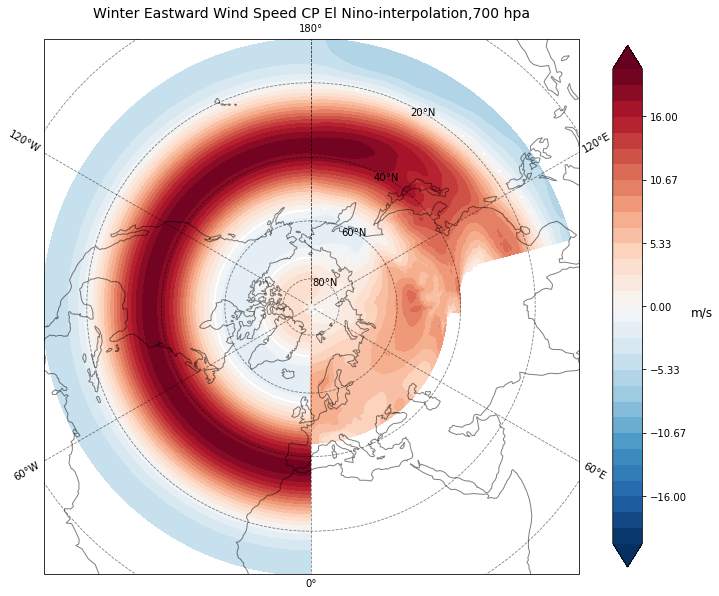

In [45]:
file1 = 'test_interp-CPNino1.nc'
ds1 = xr.open_mfdataset(file1)   

print(ds1)
lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind=ds1['U'][:,:]  ## 



fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-20, 20, 31)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('Winter Eastward Wind Speed CP El Nino-interpolation,700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

In [56]:
file='Climatological-WindSpeed_1980-2020_700hPa.nc'
f = nc.Dataset(file, 'r')
print(f)
x_old = f['lon']
print(x_old)
y_old = f['lat']
print(y_old)
z_old = f

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): time(0), y(161), x(576), level(2)
    variables(dimensions): float64 lat(y), float64 lon(x), float64 lev(level), float64 U(level, y, x)
    groups: 
<class 'netCDF4._netCDF4.Variable'>
float64 lon(x)
unlimited dimensions: 
current shape = (576,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lat(y)
unlimited dimensions: 
current shape = (161,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [62]:


file='Climatological-WindSpeed_1980-2020_700hPa.nc'
f = nc.Dataset(file, 'r')
print(f)
x_old = f['lon']
print(x_old)
y_old = f['lat']
print(y_old)
z_old = f


ref_lat=np.linspace(10,90,161)
ref_lon=np.linspace(0,360,576)
ref_grid = xr.DataArray(np.zeros((161,576)),coords=[('lat',ref_lat),('lon',ref_lon)])
x_new = ref_grid.lon.values
#print(x_new)
y_new = ref_grid.lat.values

x_old = f['lon']
y_old=f['lat']
z_old=f['U'][0,:,:]


fout = nc.Dataset('test_interp-climatology2.nc', 'w')
fout.createDimension('time', None)
fout.createDimension('y', len(y_new))
fout.createDimension('x', len(x_new))
#fout.createDimension('level',len(f['lev']))
lats = fout.createVariable('lat', float, ('y', ), zlib=True)
lons = fout.createVariable('lon', float, ('x', ), zlib=True)
#levs = fout.createVariable('lev',float, ('level', ), zlib= True)
wind = fout.createVariable('U', float, ('y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)
print(fout)
f_interp = interp2d(x_old,y_old,z_old)
test = f_interp(x_new,y_new)
print(test.shape)
#test.shape=(y_new,x_new)
fout['lat'][:] = y_new
fout['lon'][:] = x_new
fout['U'][:,:] = test
print(test)
fout.close()

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): time(0), y(161), x(576), level(2)
    variables(dimensions): float64 lat(y), float64 lon(x), float64 lev(level), float64 U(level, y, x)
    groups: 
<class 'netCDF4._netCDF4.Variable'>
float64 lon(x)
unlimited dimensions: 
current shape = (576,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lat(y)
unlimited dimensions: 
current shape = (161,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): time(0), y(161), x(576)
    variables(dimensions): float64 lat(y), float64 lon(x), float64 U(y, x)
    groups: 
(161, 576)
[[    nan     nan     nan ... -5.     -5.     -5.    ]
 [    nan     nan     nan ... -4.875  -4.875  -4.875 ]
 [    nan     nan     nan ... -4.8125 -4.8125 -4.8125]
 ...
 [-1.8125 -1.8125 -1.812

<xarray.Dataset>
Dimensions:  (x: 576, y: 161)
Dimensions without coordinates: x, y
Data variables:
    lat      (y) float64 dask.array<chunksize=(161,), meta=np.ndarray>
    lon      (x) float64 dask.array<chunksize=(576,), meta=np.ndarray>
    U        (y, x) float64 dask.array<chunksize=(161, 576), meta=np.ndarray>


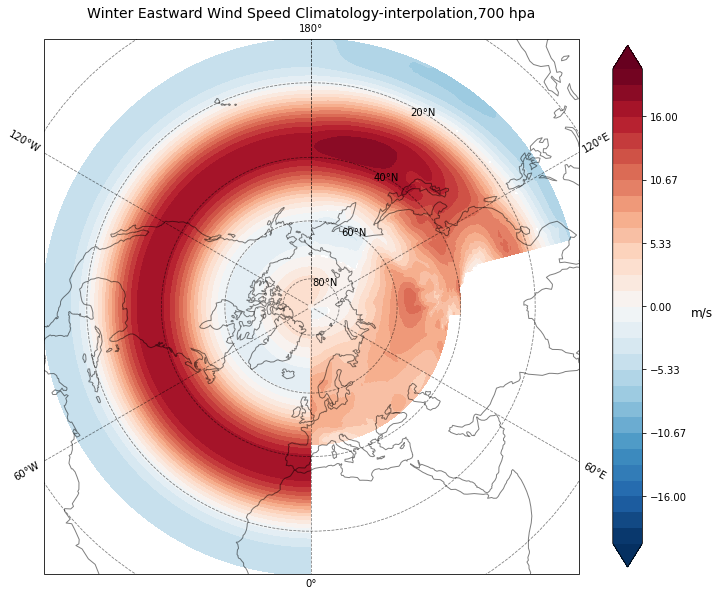

In [64]:
file1 = 'test_interp-climatology2.nc'
ds1 = xr.open_mfdataset(file1)   

print(ds1)
lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind=ds1['U'][:,:]  ## 



fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-20, 20, 31)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('Winter Eastward Wind Speed Climatology-interpolation,700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)